# Testing tac_obj
For noise file crestaion , see `Test_tac_noise.ipynb`

In [1]:
import pytac

In [5]:
tac_plan_a = """
#
# Line of filter for Plan_A
#
TAC_BLOCK Plan_A_TF0 DigitalTF 1.27608156e-07 -1.09201328e-01 2.01128208e-02 -2.20787340e-01 8.41941539e-02
TAC_BLOCK Plan_A_TF1 DigitalTF 1.00000000e+00 -7.35758822e-01 1.35335273e-01 -9.82584634e-01 2.79652134e-01 # My comment //color=red, style=dashed
TAC_BLOCK Plan_A_TF2 DigitalTF 1.00000000e+00 2.00000000e+00 1.00000000e+00 6.41074732e-01 -5.06380420e-03
TAC_BLOCK Plan_A_TF3 DigitalTF 1.00000000e+00 -1.21743565e+00 3.53285705e-01 -1.98930230e+00 9.89328869e-01
TAC_BLOCK Plan_A_TF4 DigitalTF 1.00000000e+00 -1.99097739e+00 9.90977393e-01 -1.99606523e+00 9.96080626e-01

TAC_LINK Plan_A_L0	Acc_M4 1	Plan_A_TF0	1
TAC_LINK Plan_A_L1	Plan_A_TF0 1	Plan_A_TF1	1
TAC_LINK Plan_A_L2	Plan_A_TF1 1	Plan_A_TF2	1 # // style=dashed, color=purple
TAC_LINK Plan_A_L3	Plan_A_TF2 1	Plan_A_TF3	1
TAC_LINK Plan_A_L4	Plan_A_TF3 1	Plan_A_TF4	1
TAC_LINK Plan_A_L5	Plan_A_TF4 1	Opl_Sign_M4	1

# End of filter Plan_A
#

"""

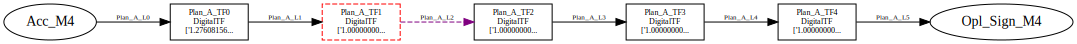

In [6]:
tac_plan_a_graph = pytac.tac_obj(src=tac_plan_a.splitlines())
tac_plan_a_graph.graph


In [7]:
tac_plan_a_graph.graph.save(filename="test_graph.gv")

'test_graph.gv'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import os

In [9]:

z_control = None

s, z = sp.symbols("s, z")

In [10]:
tweaker = pytac.control.c2d(pytac.control.tf(*pytac.sig.butter(3, (10*2*np.pi, 150*2*np.pi), btype="bandpass", analog=True)),
                                250e-6, method="zoh")
z_control = tweaker.z

In [11]:
tweaker

TransferFunction(array([ 0.00158515,  0.00091493, -0.01098346,  0.01160927, -0.00185366,
       -0.00127224]), array([  1.        ,  -5.55165359,  12.86223786, -15.92061502,
        11.10528616,  -4.13940582,   0.64415044]), 0.00025)

1.5851497374e-03 3.5771913101e+00 8.0260073648e-01 -1.7670145284e+00 8.1429161362e-01
1.0000000000e+00 -1.0000702825e+00 0.0000000000e+00 -1.7992684560e+00 8.0258983711e-01
1.0000000000e+00 -1.9999297091e+00 9.9992971409e-01 -1.9853706073e+00 9.8562949731e-01


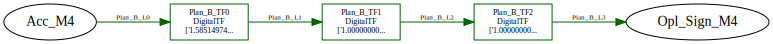

In [12]:
test_params = pytac.tf2tac_sos(tweaker, z_control, verbose=False)

#pytac.check_tac(test_params, atf, zc=z_control)

tac_plan_b = pytac.params2source(test_params, basename="Plan_B", 
                             input_block="Acc_M4",
                             output_block="Opl_Sign_M4",
                             #attr_string="# // style=dashed",
                             printit=False)
tac_plan_b_graph = pytac.tac_obj(src=tac_plan_b.splitlines())
tac_plan_b_graph.graph

In [13]:
with open("/lhome/romain/Documents/hi5/gravity+/TTRs/TTR-110.0016/TAC_modifications/vib-upgrade.tacsrc", "r") as afile:
    initial_tac_src = afile.read()
modified_tac_src, diff_tac_src = pytac.replacelines(src=initial_tac_src,
                                             added=tac_plan_b,
                                             removed=["TF1_M4", "TF2_M4","TF3_M4"],
                                         showdiff=True)

Initial length 492
Dashing :  TAC_BLOCK TF1_M4 DigitalTF 0.967139753776691 -0.990977393368562 -0.993221504038126
Dashing :  TAC_BLOCK TF2_M4 DigitalTF 1.55943205022896e-008 2 1 -1.99606532880436 0.996080719781782
Dashing :  TAC_BLOCK TF3_M4 DigitalTF 4.16571583930859 -1.78921327677427 0.789213276774273 -1.11627901172445 0.119727214363492
Dashing :  TAC_LINK Filt1_M4	Acc_M4 1	TF1_M4		1
Dashing :  TAC_LINK Filt2_M4	TF1_M4 1	TF2_M4		1
Dashing :  TAC_LINK Filt3_M4	TF2_M4 1	TF3_M4		1
Dashing :  TAC_LINK Piston_M4	TF3_M4 1	Opl_Sign_M4	1
Dashing :  TAC_LINK OPL_M4	TF3_M4 1	Probe 9
Untouched = 484
Modified = 8
Removed = 0
Total = 492
Not adding :  TAC_BLOCK TF1_M4 DigitalTF 0.967139753776691 -0.990977393368562 -0.993221504038126
Not adding :  TAC_BLOCK TF2_M4 DigitalTF 1.55943205022896e-008 2 1 -1.99606532880436 0.996080719781782
Not adding :  TAC_BLOCK TF3_M4 DigitalTF 4.16571583930859 -1.78921327677427 0.789213276774273 -1.11627901172445 0.119727214363492
Not adding :  TAC_LINK Filt1_M4	Acc_

In [14]:
plt.figure(dpi=50)
pytac.control.pzmap(building_dl_approx_5, grid=True)
plt.show()
params_5 = pytac.tf2tac_sos(building_dl_approx_5, z_control, verbose=False)
pytac.check_tac(params_5, building_dl_approx_5)

tac_plan_c = pytac.params2source(params_5, basename="Plan_C", 
                             input_block="Acc_M4",
                             output_block="Opl_Sign_M4",
                 printit=False)
tac_plan_c_graph = tac_obj(src=tac_plan_c.splitlines())
tac_plan_c_graph.graph

NameError: name 'building_dl_approx_5' is not defined

<Figure size 320x240 with 0 Axes>

In [17]:
with open("/lhome/romain/Documents/hi5/gravity+/TTRs/TTR-110.0016/TAC_modifications/vib-upgrade.tacsrc", "r") as afile:
    initial_tac_src = afile.read()

noise_mod = """
#
# Adding a switch path for direct, filtered white noise for 
# measurement of the transfer function of the delay lines
#
# Adding a band pass Butterworth filter for the noise
# third order from 1 to 500Hz implemented in 3 blocks
#
TAC_BLOCK Noise_Gain Gain 1e-6                     #//color=forestgreen
TAC_BLOCK TF1_Noise DigitalTF 3.1532607647e-02 1.9999943412e+00 9.9999434128e-01 -1.0464725204e+00 4.7894953758e-01  #//color=forestgreen
TAC_BLOCK TF2_Noise DigitalTF 1.0000000000e+00 5.9421722698e-07 -1.0000107233e+00 -1.4142135668e+00 4.1513401504e-01  #//color=forestgreen
TAC_BLOCK TF3_Noise DigitalTF 1.0000000000e+00 -1.9999949355e+00 9.9999493549e-01 -1.9984309531e+00 9.9843342322e-01   #//color=forestgreen

TAC_BLOCK Out_Switch ManualSwitch 1 2  #//color=forestgreen



TAC_LINK Raw_noise Noise 1 Noise_Gain 1  #//color=forestgreen
TAC_LINK ngained Noise_Gain 1 TF1_Noise 1  #//color=forestgreen
TAC_LINK nfilt1 TF1_Noise 1 TF2_Noise 1  #//color=forestgreen
TAC_LINK nfilt2 TF2_Noise 1 TF3_Noise 1  #//color=forestgreen


TAC_LINK  F_Noise_to_switch TF3_Noise 1 TST_Switch 4  #//color=forestgreen

# Now we feed the output signal through a switch where one
# can select to use noise instead

TAC_BLOCK Out_Switch ManualSwitch 1,2     #//color=forestgreen
TAC_LINK  Opl_to_Switch  Opl_Sign_Gain  1  Out_Switch 1    #//color=forestgreen
TAC_LINK  Filtered_Noise TF3_Noise      1  Out_Switch 2    #//color=forestgreen
TAC_LINK  Opl_or_Noise   Out_Switch     1  UT_Vib 2     #//color=forestgreen



# Extra switch for 
TAC_BLOCK Out_Info_Switch ManualSwitch 1,2     #//color=forestgreen
TAC_LINK Vib_Opl Opl_tot 1 Out_Info_Switch 1     #//color=forestgreen
TAC_LINK Filtered_Noise_Info TF3_Noise 1 Out_Info_Switch 2     #//color=forestgreen
TAC_LINK  Opl_or_Noise_Info   Out_Info_Switch  1   UT_Raw2 1     #//color=forestgreen

""" 


modified_tac_src, diff_tac_src = pytac.replacelines(src=initial_tac_src,
                                             added=noise_mod,
                                             removed=[],
                                            match_names=["TAC_LINK  Opl           Opl_Sig",
                                                        "TAC_LINK  VibOpl   Opl_tot   1"],
                                             showdiff=True)
tac_diff_graph = pytac.tac_obj(src=diff_tac_src.splitlines(),)TAC_LINK  VibOpl   Opl_tot   1
#tac_diff_graph.graph.save("tac_diff_graph.gv")

Initial length 492
Dashing :  TAC_LINK  Opl           Opl_Sign_Gain 1 UT_Vib 2
Dashing :  TAC_LINK  VibOpl   Opl_tot   1  UT_Raw2 1
Untouched = 490
Modified = 2
Removed = 0
Total = 492
Not adding :  TAC_LINK  Opl           Opl_Sign_Gain 1 UT_Vib 2
Not adding :  TAC_LINK  VibOpl   Opl_tot   1  UT_Raw2 1
Untouched = 490
Modified = 0
Removed = 2
Total = 490
Appending  
Appending  #
Appending  # Adding a switch path for direct, filtered white noise for 
Appending  # measurement of the transfer function of the delay lines
Appending  #
Appending  # Adding a band pass Butterworth filter for the noise
Appending  # third order from 1 to 500Hz implemented in 3 blocks
Appending  #
Appending  TAC_BLOCK Noise_Gain Gain 1e-6                     #//color=forestgreen
Appending  TAC_BLOCK TF1_Noise DigitalTF 3.1532607647e-02 1.9999943412e+00 9.9999434128e-01 -1.0464725204e+00 4.7894953758e-01  #//color=forestgreen
Appending  TAC_BLOCK TF2_Noise DigitalTF 1.0000000000e+00 5.9421722698e-07 -1.0000107233e

'tac_diff_graph.gv'

In [ ]:
with open("/lhome/romain/Documents/")